# 1.Evaluate Performance

#### Now that data is cleaned and ready, the next step is to evaluate the performance of various machine learning and deep learning models to identify the best method for predicting diabetes outcomes.

## A.Load cleaned dataframe and libraries

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [61]:

# Load the cleaned data
cleaned_file_path = '../midter_proj/cleaned_diabetes_data.csv'
data = pd.read_csv(cleaned_file_path)

# Display the first few rows to ensure it's loaded correctly
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group,Glucose_Insulin_Ratio,BMI_Age_Interaction
0,6,0.670968,0.50000,0.56,NaN,0.480499,0.627,0.637363,1,Obese,Senior,NaN,0.306252
1,1,0.264516,0.40625,0.44,NaN,0.262090,0.351,0.219780,0,Overweight,Middle-aged,NaN,0.057602
2,8,0.896774,0.37500,NaN,NaN,0.159126,0.672,0.241758,1,Normal,Middle-aged,NaN,0.038470
3,1,0.290323,0.40625,0.32,0.230797,0.308892,0.167,0.000000,0,Overweight,Young,0.936842,0.000000
4,0,0.600000,0.00000,0.56,0.444284,0.776911,2.288,0.263736,1,Obese,Middle-aged,0.810651,0.204900


## B.Data Splitting

#### split the data into training and testing sets. We'll use a 70-30 split (train-test ratio).

In [62]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target variable (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the splits
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (537, 12)
Test data shape: (231, 12)


## C.Model Selection and Training

#### We will test the following models:

1. Logistic Regression
2. Random Forest
3. Support Vector Machine (SVM)
4. K-Nearest Neighbors (KNN)
5. Deep Learning Model (Neural Network)

In [63]:
# Identify categorical columns
categorical_columns = ['BMI_Category', 'Age_Group']  # Replace with your actual categorical columns if different

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding for categorical columns
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Ensure all features are numeric now
print(X_train.head())

# Drop rows with NaN values
X_train = X_train.dropna()
X_test = X_test.dropna()

# Also ensure that y_train and y_test have the same rows as X_train and X_test
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

# Now let's initialize and evaluate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
}

# Results storage
results = {}

# Iterate over the models
for model_name, model in models.items():
    # Standardize features for models like SVM and Logistic Regression
    if model_name in ["Logistic Regression", "SVM"]:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled if model_name in ["Logistic Regression", "SVM"] else X_test)
    
    # Evaluate performance
    accuracy = model.score(X_test_scaled if model_name in ["Logistic Regression", "SVM"] else X_test, y_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled if model_name in ["Logistic Regression", "SVM"] else X_test)[:, 1])
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "AUC": auc_score,
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"Classification Report:\n{results[model_name]['Classification Report']}")
    print(f"Confusion Matrix:\n{results[model_name]['Confusion Matrix']}")
    print("\n" + "-"*60)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
334            1  0.329032         0.3125           0.22  0.126938  0.177847   
139            5  0.393548         0.5000           0.44  0.897223  0.583463   
485            0  0.587097         0.4375           0.70  0.680851  0.751950   
547            4  0.561290         0.4375           0.28  0.438514  0.464899   
18             1  0.380645         0.0000           0.62  0.199062  0.783151   

     DiabetesPedigreeFunction       Age  BMI_Category  Age_Group  \
334                     0.260  0.021978             0          2   
139                     0.159  0.153846             1          2   
485                     0.365  0.065934             1          2   
547                     0.160  0.153846             1          2   
18                      0.183  0.263736             1          0   

     Glucose_Insulin_Ratio  BMI_Age_Interaction  
334               1.610169             0.003909  
139       

## D.Deep Learning Model

Deep Learning Model (Neural Network)

In [64]:
# Create a simple Neural Network model
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the neural network model
nn_model = create_nn_model(X_train.shape[1])

# Standardize the data for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the test set
nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)[1]
nn_predictions = nn_model.predict(X_test_scaled)
nn_auc = roc_auc_score(y_test, nn_predictions)

print(f"Deep Learning Model Accuracy: {nn_accuracy:.4f}")
print(f"Deep Learning Model AUC Score: {nn_auc:.4f}")


Epoch 1/20
9/9 [==============================] - 0s 906us/step - loss: 0.6640 - accuracy: 0.6533
Epoch 2/20
9/9 [==============================] - 0s 885us/step - loss: 0.5723 - accuracy: 0.7409
Epoch 3/20
9/9 [==============================] - 0s 820us/step - loss: 0.5049 - accuracy: 0.7591
Epoch 4/20
9/9 [==============================] - 0s 900us/step - loss: 0.4642 - accuracy: 0.7810
Epoch 5/20
9/9 [==============================] - 0s 715us/step - loss: 0.4332 - accuracy: 0.8029
Epoch 6/20
9/9 [==============================] - 0s 864us/step - loss: 0.4119 - accuracy: 0.8066
Epoch 7/20
9/9 [==============================] - 0s 764us/step - loss: 0.3976 - accuracy: 0.8175
Epoch 8/20
9/9 [==============================] - 0s 829us/step - loss: 0.3879 - accuracy: 0.8139
Epoch 9/20
9/9 [==============================] - 0s 735us/step - loss: 0.3816 - accuracy: 0.8175
Epoch 10/20
9/9 [==============================] - 0s 823us/step - loss: 0.3733 - accuracy: 0.8175
Epoch 11/20
9/9 [==

## E.Plotting Model Performance
visualize the performance of the models using Accuracy and AUC scores.

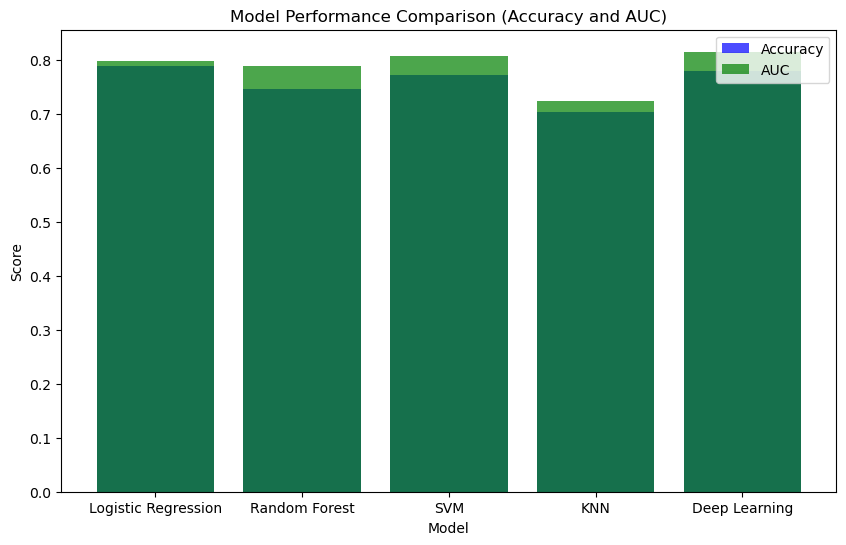

In [65]:
import matplotlib.pyplot as plt

# Extract accuracy and AUC for plotting
model_names = list(results.keys())
accuracy_scores = [results[model]["Accuracy"] for model in model_names]
auc_scores = [results[model]["AUC"] for model in model_names]

# Add deep learning model results to the plot
model_names.append('Deep Learning')
accuracy_scores.append(nn_accuracy)
auc_scores.append(nn_auc)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue', alpha=0.7, label='Accuracy')
plt.bar(model_names, auc_scores, color='green', alpha=0.7, label='AUC')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Accuracy and AUC)')
plt.legend()
plt.show()


# 2.Next steps

### A.Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
        "solver": ["liblinear", "lbfgs"],  # Optimization algorithm
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],  # Number of trees
        "max_depth": [None, 10, 20, 30],  # Max depth of trees
        "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
        "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
    },
    "SVM": {
        "C": [0.1, 1, 10],  # Regularization parameter
        "kernel": ["linear", "rbf"],  # Kernel type
        "gamma": ["scale", "auto"],  # Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],  # Number of neighbors to use
        "weights": ["uniform", "distance"],  # Weight function used in prediction
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # Algorithm used to compute nearest neighbors
        "leaf_size": [30, 40, 50],  # Leaf size passed to BallTree or KDTree
    }
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    # Get the parameter grid for the current model
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Save the best model and its parameters
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")
    print("-" * 60)

# Evaluate the best models
results = {}
for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = model.score(X_test, y_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "AUC": auc_score,
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"Classification Report:\n{results[model_name]['Classification Report']}")
    print(f"Confusion Matrix:\n{results[model_name]['Confusion Matrix']}")
    print("\n" + "-"*60)


Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.791986531986532
------------------------------------------------------------
Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score for Random Forest: 0.8067340067340067
------------------------------------------------------------
Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVM: 0.7812121212121212
------------------------------------------------------------
Tuning KNN...
Fitting 5 folds for each of 96 candidates, totalling 480 fits


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc7dfcd3520>
Traceback (most recent call last):
  File "/home/awmirma/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    if backend not in self.loaded_backends:
  File "/home/awmirma/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    
  File "/home/awmirma/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    ):
  File "/home/awmirma/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    return num_threads
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fdf4b82e9e0>
Traceback (most recent call last):
  File "/home/awmirma/

Best parameters for KNN: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}
Best score for KNN: 0.7774410774410775
------------------------------------------------------------
Model: Logistic Regression
Accuracy: 0.7797
AUC Score: 0.7936
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84        78
           1       0.73      0.55      0.63        40

    accuracy                           0.78       118
   macro avg       0.76      0.72      0.74       118
weighted avg       0.77      0.78      0.77       118

Confusion Matrix:
[[70  8]
 [18 22]]

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.7542
AUC Score: 0.7917
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        78
           1       0.64      0.62      0.63        40

    accuracy                           0.

#### B. Ensemble Methods

Ensemble methods like Random Forests, Gradient Boosting, and AdaBoost are often used to combine multiple models and improve performance. We try these ensemble techniques for even better results.

In [67]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Ensemble models
ensemble_models = {
    "Random Forest (Ensemble)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Evaluate ensemble models
ensemble_results = {}
for model_name, model in ensemble_models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    
    # Evaluate performance
    accuracy = model.score(X_test_imputed, y_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test_imputed)[:, 1])
    
    # Store results
    ensemble_results[model_name] = {
        "Accuracy": accuracy,
        "AUC": auc_score,
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"Classification Report:\n{ensemble_results[model_name]['Classification Report']}")
    print(f"Confusion Matrix:\n{ensemble_results[model_name]['Confusion Matrix']}")
    print("\n" + "-"*60)


Model: Random Forest (Ensemble)
Accuracy: 0.7458
AUC Score: 0.7883
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        78
           1       0.63      0.60      0.62        40

    accuracy                           0.75       118
   macro avg       0.72      0.71      0.71       118
weighted avg       0.74      0.75      0.74       118

Confusion Matrix:
[[64 14]
 [16 24]]

------------------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.7627
AUC Score: 0.7946
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        78
           1       0.64      0.68      0.66        40

    accuracy                           0.76       118
   macro avg       0.74      0.74      0.74       118
weighted avg       0.77      0.76      0.76       118

Confusion Matrix:
[[63 15]
 [13 27]]

------------------------------------

#### C. Model Selection: Choose the Best Model

Once we have the performance metrics for each model (including the tuned versions and ensemble models), we can select the best one based on performance metrics like accuracy and AUC score.

To choose the best model, we can simply compare the results of the models:

In [68]:
# Compare performance of all models
all_results = {**results, **ensemble_results}

# Find the best model based on AUC score
best_model_name = max(all_results, key=lambda x: all_results[x]['AUC'])
best_model = all_results[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Model Accuracy: {best_model['Accuracy']:.4f}")
print(f"Best Model AUC Score: {best_model['AUC']:.4f}")
print(f"Classification Report:\n{best_model['Classification Report']}")
print(f"Confusion Matrix:\n{best_model['Confusion Matrix']}")


Best Model: SVM
Best Model Accuracy: 0.7712
Best Model AUC Score: 0.7974
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        78
           1       0.70      0.57      0.63        40

    accuracy                           0.77       118
   macro avg       0.75      0.72      0.73       118
weighted avg       0.77      0.77      0.77       118

Confusion Matrix:
[[68 10]
 [17 23]]


# 3.Model Evaluation and Visualization of SVM Performance

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81        78
           1       0.64      0.40      0.49        40

    accuracy                           0.72       118
   macro avg       0.69      0.64      0.65       118
weighted avg       0.71      0.72      0.70       118

Confusion Matrix:
 [[69  9]
 [24 16]]


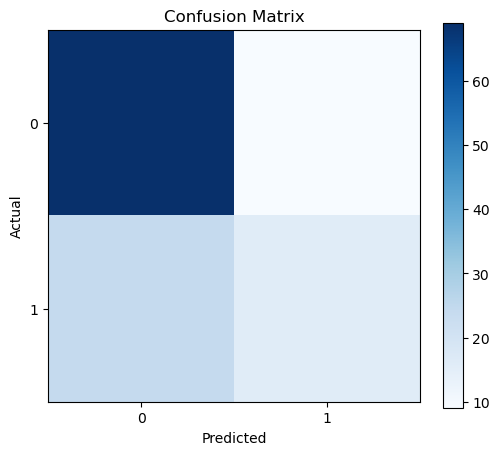

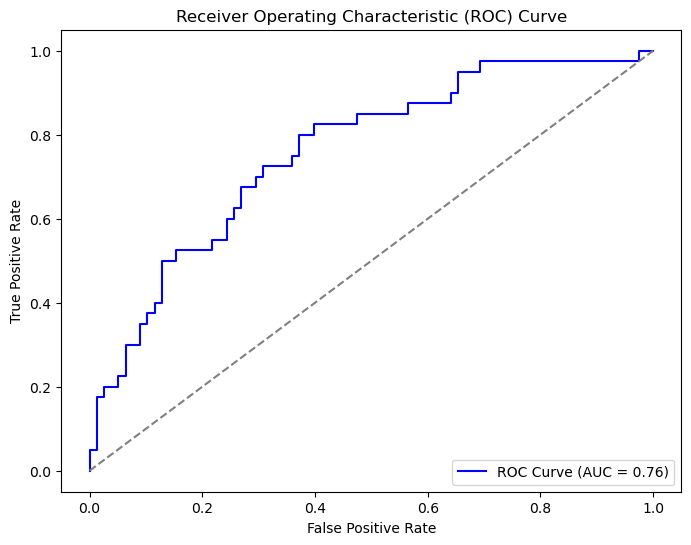

In [69]:
# Import necessary libraries
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Assuming data is already loaded and split: X_train, X_test, y_train, y_test

# Step 1: Train the SVM model with the best parameters
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)  # Replace with best parameters if available
svm_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC, binary classification only

# Step 3: Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 4: Visualization

# (a) Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), labels=np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), labels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# (b) ROC Curve (only for binary classification)
if len(np.unique(y_test)) == 2:  # Binary classification check
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# (c) Decision Boundary Visualization (only if 2 features or PCA-reduced data)
if X_train.shape[1] == 2:  # 2D features
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm, label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', cmap=plt.cm.coolwarm, label="Test Data")
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
